### all this to load in a crap beersheba file and check the Thallium location

In [4]:
import sys,os,os.path
sys.path.append("../../")   # cite IC from parent directory
                            # NOTE if you can't import IC stuff, its because of the
                            # above line
#sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'

import os
import glob
import numpy  as np
import pandas as pd
import tables as tb
import matplotlib.pyplot as plt

from IC.invisible_cities.reco.psf_functions    import create_psf
from IC.invisible_cities.reco.psf_functions    import hdst_psf_processing
from IC.invisible_cities.reco.psf_functions    import add_empty_sensors_and_normalize_q
from IC.invisible_cities.reco.psf_functions    import add_variable_weighted_mean

from invisible_cities.io.dst_io import load_dst


import IC.invisible_cities.core.core_functions as     coref
import IC.invisible_cities.io  .dst_io         as     dstio

from IC.invisible_cities.database              import load_db
#from IC.invisible_cities.io      .kdst_io      import psf_writer
# he's dead jim, make psf_writer yourself

In [2]:
location = '/home/e78368jw/Downloads/tmp_out/testing_arena/beersheba_297_208Tl.h5'

In [6]:
df = load_dst(location, 'MC', 'particles')
display(df)

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
0,2960000,1,Tl208,True,0,-395.559387,394.950073,362.778778,0.000000,-395.559387,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,none,RadioactiveDecay
1,2960000,4,e-,False,1,-395.559387,394.950073,362.778778,0.000048,-396.876007,...,0.467557,0.276600,0.151788,0.000000,0.000000,0.000000,0.250103,10.664938,RadioactiveDecay,eIoni
2,2960000,3,anti_nu_e,False,1,-395.559387,394.950073,362.778778,0.000048,-8913.140625,...,-0.767937,-1.162597,-0.681496,-0.767937,-1.162597,-0.681496,1.551063,17203.623047,RadioactiveDecay,Transportation
3,2960000,2,Pb208[3197.711],False,1,-395.559387,394.950073,362.778778,0.000048,-395.559387,...,0.300380,0.885996,0.529707,0.000000,0.000000,0.000000,0.000003,0.000000,RadioactiveDecay,RadioactiveDecay
4,2960000,6,gamma,False,2,-395.559387,394.950073,362.778778,0.000048,-1.969257,...,0.092302,0.104529,0.566271,0.000000,-0.000000,-0.000000,0.583188,1183.180054,RadioactiveDecay,phot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24270,2960307,66,e-,False,61,-395.573303,389.761017,365.873260,0.079308,-395.573303,...,-0.020734,-0.011697,-0.005720,-0.000000,-0.000000,-0.000000,0.000586,0.000008,phot,eIoni
24271,2960307,65,e-,False,61,-395.573303,389.761017,365.873260,0.079308,-395.573303,...,-0.033459,0.059495,-0.011000,0.000000,0.000000,-0.000000,0.004656,0.000157,phot,eIoni
24272,2960307,60,e-,False,56,-395.558319,389.758911,365.853851,0.079226,-395.558319,...,-0.010024,0.017035,0.004849,-0.000000,0.000000,0.000000,0.000405,0.000006,phot,eIoni
24273,2960307,55,e-,False,54,-395.557800,389.759949,365.852356,0.079219,-395.553864,...,0.204280,-0.223273,-0.387921,0.000000,-0.000000,0.000000,0.198356,0.078608,phot,eIoni


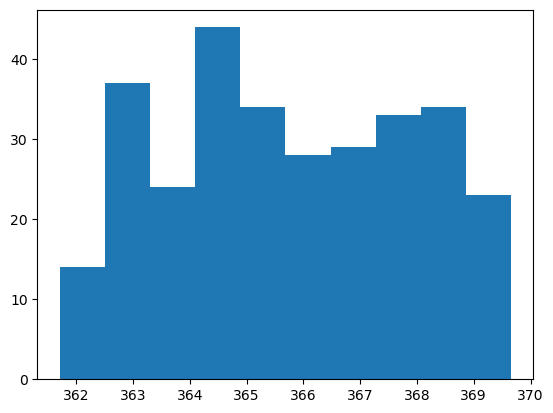

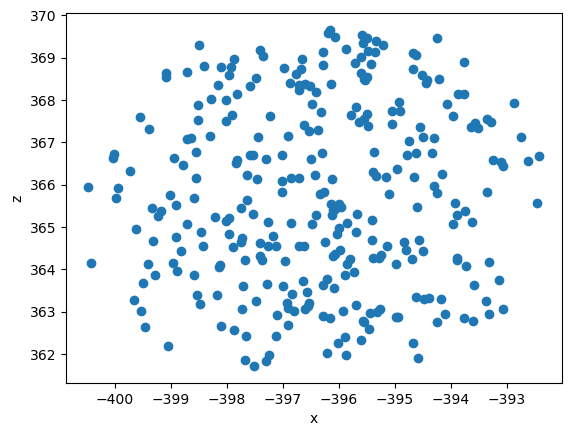

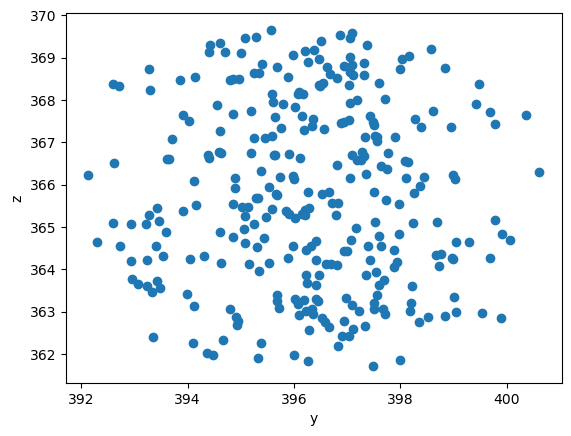

In [12]:
plt.hist((df[df.particle_name == 'Tl208']).initial_z.values)
plt.show()

plt.scatter((df[df.particle_name == 'Tl208']).initial_x.values, (df[df.particle_name == 'Tl208']).initial_z.values)
plt.xlabel('x')
plt.ylabel('z')
plt.show()

plt.scatter((df[df.particle_name == 'Tl208']).initial_y.values, (df[df.particle_name == 'Tl208']).initial_z.values)
plt.xlabel('y')
plt.ylabel('z')
plt.show()

### now 1b just for sanity

In [13]:
location_1b = '/home/e78368jw/Downloads/tmp_out/testing_arena/hypathia_290_208Tl.h5'

df = load_dst(location_1b, 'MC', 'particles')
display(df)

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
0,2890000,1,Tl208,True,0,-396.732880,396.891754,365.447845,0.000000,-396.732880,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,none,RadioactiveDecay
1,2890000,4,e-,False,1,-396.732880,396.891754,365.447845,0.001146,-397.134735,...,-0.024115,0.387169,0.478374,-0.000000,0.000000,-0.000000,0.289278,5.075587,RadioactiveDecay,eIoni
2,2890000,3,anti_nu_e,False,1,-396.732880,396.891754,365.447845,0.001146,-7326.999023,...,-0.432364,0.413664,-0.802647,-0.432364,0.413664,-0.802647,1.001148,16047.190430,RadioactiveDecay,Transportation
3,2890000,2,Pb208[3708.451],False,1,-396.732880,396.891754,365.447845,0.001146,-396.732880,...,0.456478,-0.800832,0.324272,0.000000,-0.000000,0.000000,0.000002,0.000000,RadioactiveDecay,RadioactiveDecay
4,2890000,6,gamma,False,2,-396.732880,396.891754,365.447845,0.001146,-120.177216,...,-0.307970,-0.364649,0.181769,0.000000,0.000000,-0.000000,0.510739,612.607910,RadioactiveDecay,phot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25469,2890314,49,e-,False,45,-383.729889,397.313782,424.253052,0.209761,-383.951233,...,0.331845,-0.344126,0.879599,-0.000000,0.000000,0.000000,0.612993,2.717162,compt,eIoni
25470,2890314,48,e-,False,45,-387.578979,397.484680,390.849182,0.097599,-387.522491,...,0.448968,0.529668,0.142844,-0.000000,-0.000000,0.000000,0.362869,0.209705,compt,eIoni
25471,2890314,47,e-,False,45,-394.267242,391.275116,376.943817,0.042118,-394.267242,...,-0.009197,0.024176,0.017061,-0.000000,-0.000000,-0.000000,0.000939,0.000016,compt,eIoni
25472,2890314,46,e-,False,45,-394.267242,391.275116,376.943817,0.042118,-394.039948,...,-0.045580,-0.886786,1.377463,-0.000000,-0.000000,0.000000,1.205682,0.911059,compt,eIoni


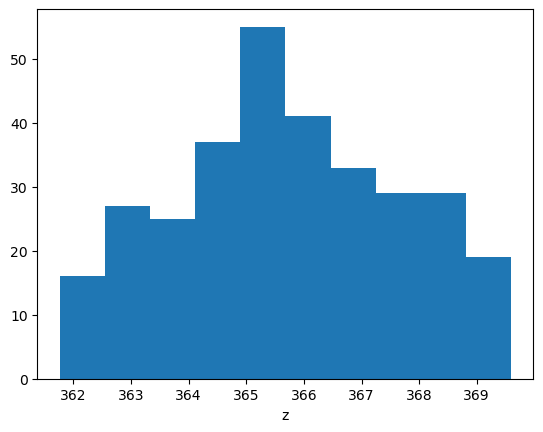

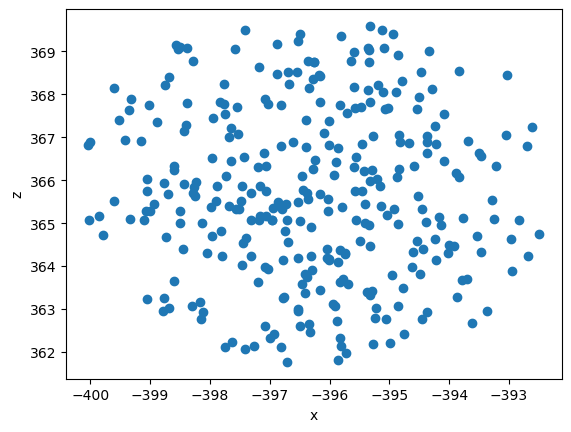

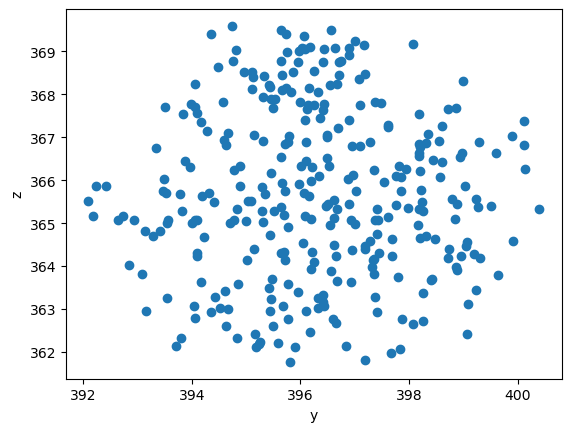

In [ ]:
plt.hist((df[df.particle_name == 'Tl208']).initial_z.values)
plt.xlabel('z')
plt.show()

plt.scatter((df[df.particle_name == 'Tl208']).initial_x.values, (df[df.particle_name == 'Tl208']).initial_z.values)
plt.xlabel('x')
plt.ylabel('z')
plt.show()

plt.scatter((df[df.particle_name == 'Tl208']).initial_y.values, (df[df.particle_name == 'Tl208']).initial_z.values)
plt.xlabel('y')
plt.ylabel('z')
plt.show()

### okay, lets explicitly take 1a now as 1b look identical to the first

In [15]:
location_1a = '/home/e78368jw/Downloads/tmp_out/testing_arena/hypathia_289_208Tl.h5'

df_1a = load_dst(location_1a, 'MC', 'particles')
display(df_1a)

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
0,2880000,1,Tl208,True,0,395.090698,399.200073,536.304382,0.000000,395.090698,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,none,RadioactiveDecay
1,2880000,4,e-,False,1,395.090698,399.200073,536.304382,0.000082,395.075043,...,-0.001139,-0.221551,-0.652353,-0.000000,-0.000000,0.000000,0.346772,6.770031,RadioactiveDecay,eIoni
2,2880000,5,e-,False,4,395.075409,398.882477,535.401489,0.004058,395.077271,...,0.005390,0.052391,-0.024986,-0.000000,-0.000000,0.000000,0.003314,0.464941,eIoni,eIoni
3,2880000,3,anti_nu_e,False,1,395.090698,399.200073,536.304382,0.000082,-11989.454102,...,-0.813099,-0.846888,0.083892,-0.813099,-0.846888,0.083892,1.177025,17927.605469,RadioactiveDecay,Transportation
4,2880000,2,Pb208[3475.078],False,1,395.090698,399.200073,536.304382,0.000082,395.090698,...,0.814237,1.068437,0.568461,0.000000,0.000000,0.000000,0.000005,0.000000,RadioactiveDecay,RadioactiveDecay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29428,2880375,92,e-,False,87,310.223022,2.396898,525.386230,1.820206,310.223083,...,0.001949,-0.002799,0.003457,0.000000,-0.000000,0.000000,0.000023,0.000329,phot,eIoni
29429,2880375,91,e-,False,87,310.223022,2.396898,525.386230,1.820206,310.226593,...,0.049100,0.011797,-0.021080,0.000000,-0.000000,-0.000000,0.002922,0.025584,phot,eIoni
29430,2880375,90,e-,False,87,310.223022,2.396898,525.386230,1.820206,310.223633,...,-0.005052,0.012097,0.000621,0.000000,0.000000,-0.000000,0.000169,0.000844,phot,eIoni
29431,2880375,89,e-,False,87,310.223022,2.396898,525.386230,1.820206,310.223450,...,0.019016,0.001423,0.010996,0.000000,0.000000,-0.000000,0.000474,0.002581,phot,eIoni


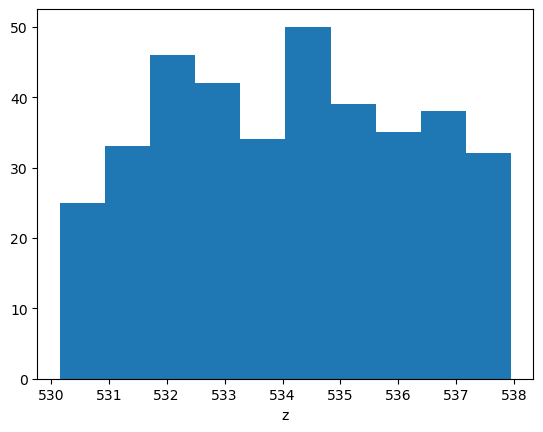

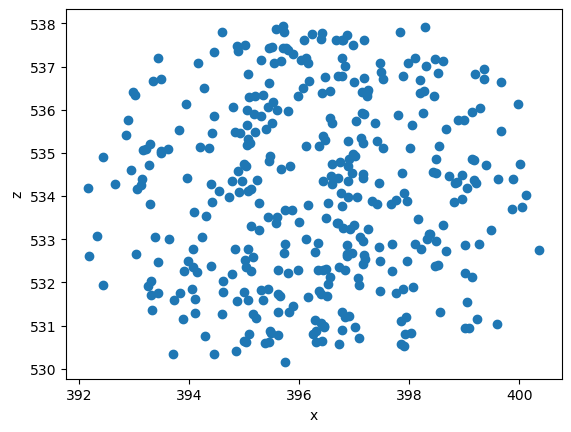

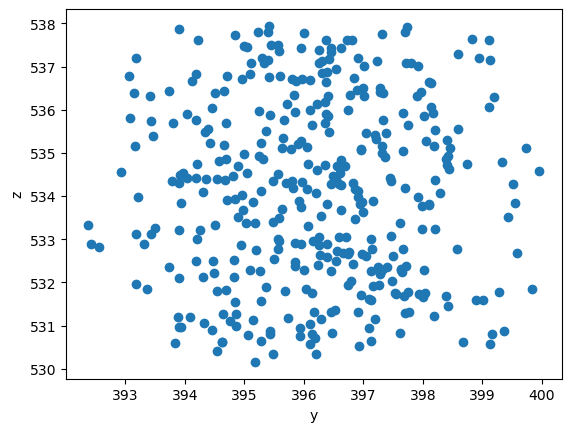

In [16]:
plt.hist((df_1a[df_1a.particle_name == 'Tl208']).initial_z.values)
plt.xlabel('z')
plt.show()

plt.scatter((df_1a[df_1a.particle_name == 'Tl208']).initial_x.values, (df_1a[df_1a.particle_name == 'Tl208']).initial_z.values)
plt.xlabel('x')
plt.ylabel('z')
plt.show()

plt.scatter((df_1a[df_1a.particle_name == 'Tl208']).initial_y.values, (df_1a[df_1a.particle_name == 'Tl208']).initial_z.values)
plt.xlabel('y')
plt.ylabel('z')
plt.show()

### for holisticity: port 2a

In [17]:
location_2a = '/home/e78368jw/Downloads/tmp_out/testing_arena/hypathia_288_208Tl.h5'

df_2a = load_dst(location_2a, 'MC', 'particles')
display(df_2a)

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
0,2870000,1,Tl208,True,0,394.566040,397.940491,1125.203003,0.000000,394.566040,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,none,RadioactiveDecay
1,2870000,4,e-,False,1,394.566040,397.940491,1125.203003,0.000046,400.252838,...,-0.294272,1.176616,-0.344015,0.000000,0.000000,0.000000,0.849327,1.029206e+01,RadioactiveDecay,eIoni
2,2870000,3,anti_nu_e,False,1,394.566040,397.940491,1125.203003,0.000046,133.543976,...,-0.017811,0.825768,0.473046,-0.017811,0.825768,0.473046,0.951831,1.394958e+04,RadioactiveDecay,Transportation
3,2870000,2,Pb208[3197.711],False,1,394.566040,397.940491,1125.203003,0.000046,394.566040,...,0.312082,-2.002383,-0.129030,0.000000,-0.000000,-0.000000,0.000011,0.000000e+00,RadioactiveDecay,RadioactiveDecay
4,2870000,6,gamma,False,2,394.566040,397.940491,1125.203003,0.000046,6.100351,...,-0.309081,-0.425554,-0.251956,-0.000000,-0.000000,0.000000,0.583188,4.504008e+02,RadioactiveDecay,phot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20003,2870257,119,e-,False,63,290.043762,406.210968,1042.556763,0.475814,289.659058,...,-0.081581,0.057663,0.252581,0.000000,-0.000000,0.000000,0.067704,5.432549e+00,eIoni,eIoni
20004,2870257,118,e-,False,63,290.257782,405.461700,1042.343750,0.472642,290.186127,...,-0.075570,0.066092,-0.141381,0.000000,0.000000,-0.000000,0.028619,8.114775e-01,eIoni,eIoni
20005,2870257,62,e-,False,60,386.446350,397.995239,1105.326660,0.079764,386.446350,...,-0.002215,0.004946,-0.001407,-0.000000,0.000000,-0.000000,0.000031,1.176449e-07,compt,msc
20006,2870257,61,e-,False,60,386.446350,397.995239,1105.326660,0.079764,386.624207,...,0.140676,-0.166084,-1.294124,-0.000000,0.000000,-0.000000,0.897280,6.952699e-01,compt,eIoni


In [18]:
def plot_me_lots(df_1a):
    plt.hist((df_1a[df_1a.particle_name == 'Tl208']).initial_z.values)
    plt.xlabel('z')
    plt.show()

    plt.scatter((df_1a[df_1a.particle_name == 'Tl208']).initial_x.values, (df_1a[df_1a.particle_name == 'Tl208']).initial_z.values)
    plt.xlabel('x')
    plt.ylabel('z')
    plt.show()

    plt.scatter((df_1a[df_1a.particle_name == 'Tl208']).initial_y.values, (df_1a[df_1a.particle_name == 'Tl208']).initial_z.values)
    plt.xlabel('y')
    plt.ylabel('z')
    plt.show()

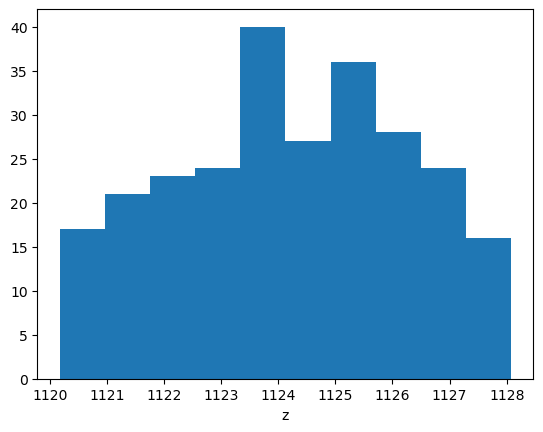

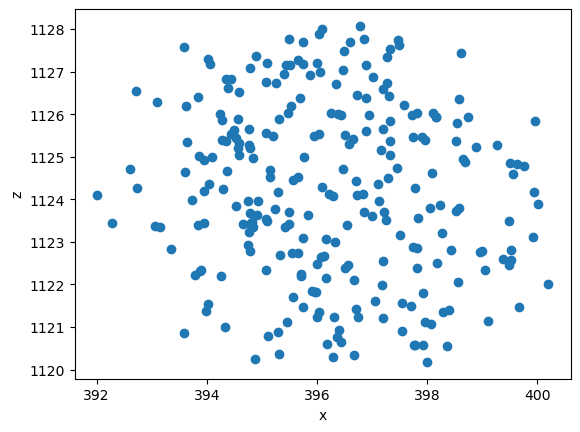

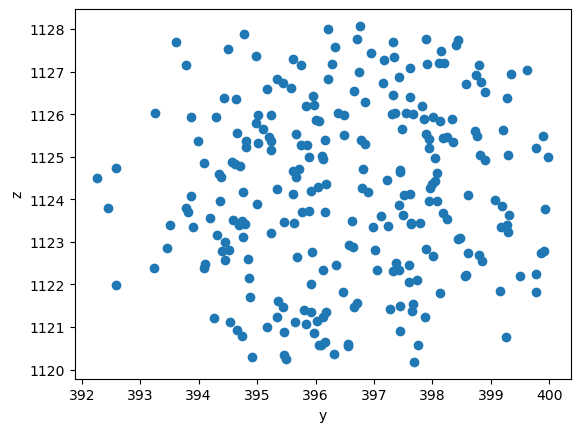

In [19]:
plot_me_lots(df_2a)

### now 2b
or not 2b...

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
0,2860000,1,Tl208,True,0,-397.902832,392.543793,866.061035,0.000000,-397.902832,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,none,RadioactiveDecay
1,2860000,4,e-,False,1,-397.902832,392.543793,866.061035,0.001272,-398.909637,...,-0.728383,0.968495,0.331670,-0.000000,0.000000,-0.000000,0.845338,25.099756,RadioactiveDecay,eIoni
2,2860000,3,anti_nu_e,False,1,-397.902832,392.543793,866.061035,0.001272,-2223.715332,...,-0.082919,-0.585516,0.332572,-0.082919,-0.585516,0.332572,0.678461,14939.105469,RadioactiveDecay,Transportation
3,2860000,2,Pb208[3475.078],False,1,-397.902832,392.543793,866.061035,0.001272,-397.902832,...,0.811303,-0.382980,-0.664242,0.000000,-0.000000,-0.000000,0.000003,0.000000,RadioactiveDecay,RadioactiveDecay
4,2860000,36,e-,False,2,-397.902832,392.543793,866.061035,0.001272,-398.063171,...,-0.493789,-0.296036,-0.064632,-0.000000,-0.000000,-0.000000,0.261505,0.317730,RadioactiveDecay,eIoni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25866,2860323,98,e-,False,56,-254.949203,-363.587769,491.173004,3.446831,-255.163422,...,0.080683,-0.039905,0.189304,-0.000000,-0.000000,0.000000,0.041322,2.319486,eIoni,eIoni
25867,2860323,97,e-,False,56,-235.001694,-349.263489,479.686768,3.352160,-234.952927,...,-0.205795,0.136264,-0.199159,0.000000,0.000000,-0.000000,0.090419,4.710385,eIoni,eIoni
25868,2860323,125,e-,False,97,-235.135574,-349.552551,478.186676,3.367770,-235.141479,...,-0.014260,0.033149,-0.124900,0.000000,-0.000000,0.000000,0.016279,0.397792,eIoni,eIoni
25869,2860323,96,e-,False,56,-176.715668,-249.956619,449.139099,2.877433,-176.682892,...,0.022841,0.001383,0.128826,0.000000,-0.000000,0.000000,0.016485,0.314482,eIoni,eIoni


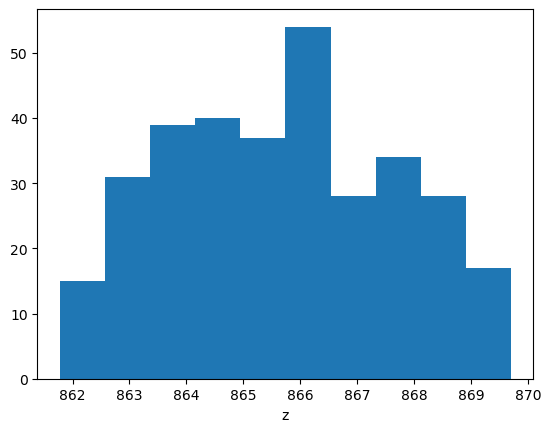

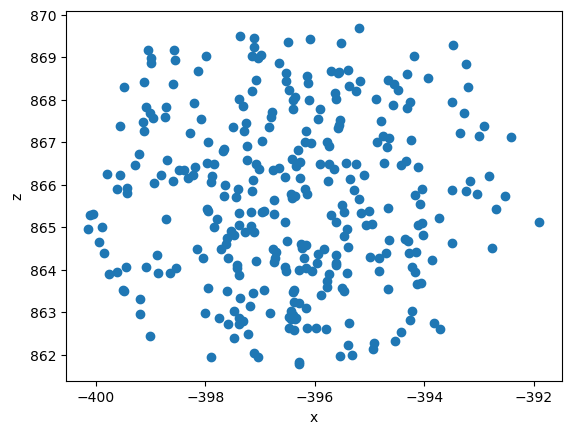

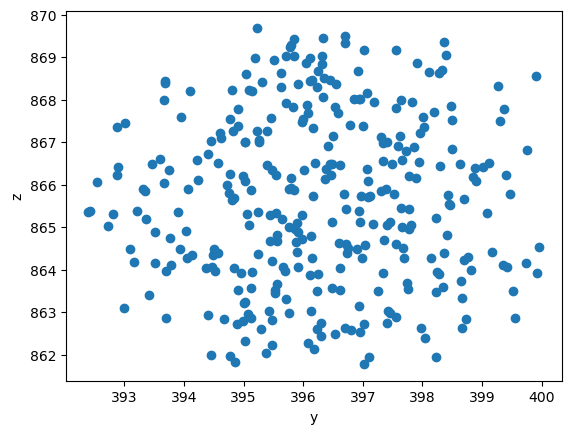

In [20]:
location_2b = '/home/e78368jw/Downloads/tmp_out/testing_arena/hypathia_287_208Tl.h5'

df_2b = load_dst(location_2b, 'MC', 'particles')
display(df_2b)
plot_me_lots(df_2b)